In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [4]:
trainData = pd.read_csv('input/train.csv')
testData = pd.read_csv('input/test.csv')

print('\n', 'Train dataset shape:', trainData.shape[0],'x', trainData.shape[1],'\n'
      'Test dataset shape:', testData.shape[0],'x', testData.shape[1])


 Train dataset shape: 1460 x 81 
Test dataset shape: 1459 x 80


In [5]:
# Let's look at the head and tail of training dataset
trainData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [6]:
# It is difficult to view all of the columns in the DF format; we can call on the attribute
# 'columns' for the DF in order to get a list of the columns
trainData.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# We use the .info() method to get more information on the types of data and prevalence
# of missing - or null - records in each feature
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# EDA

Percentage of missing values per feature:
LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64
Numeric features: 38


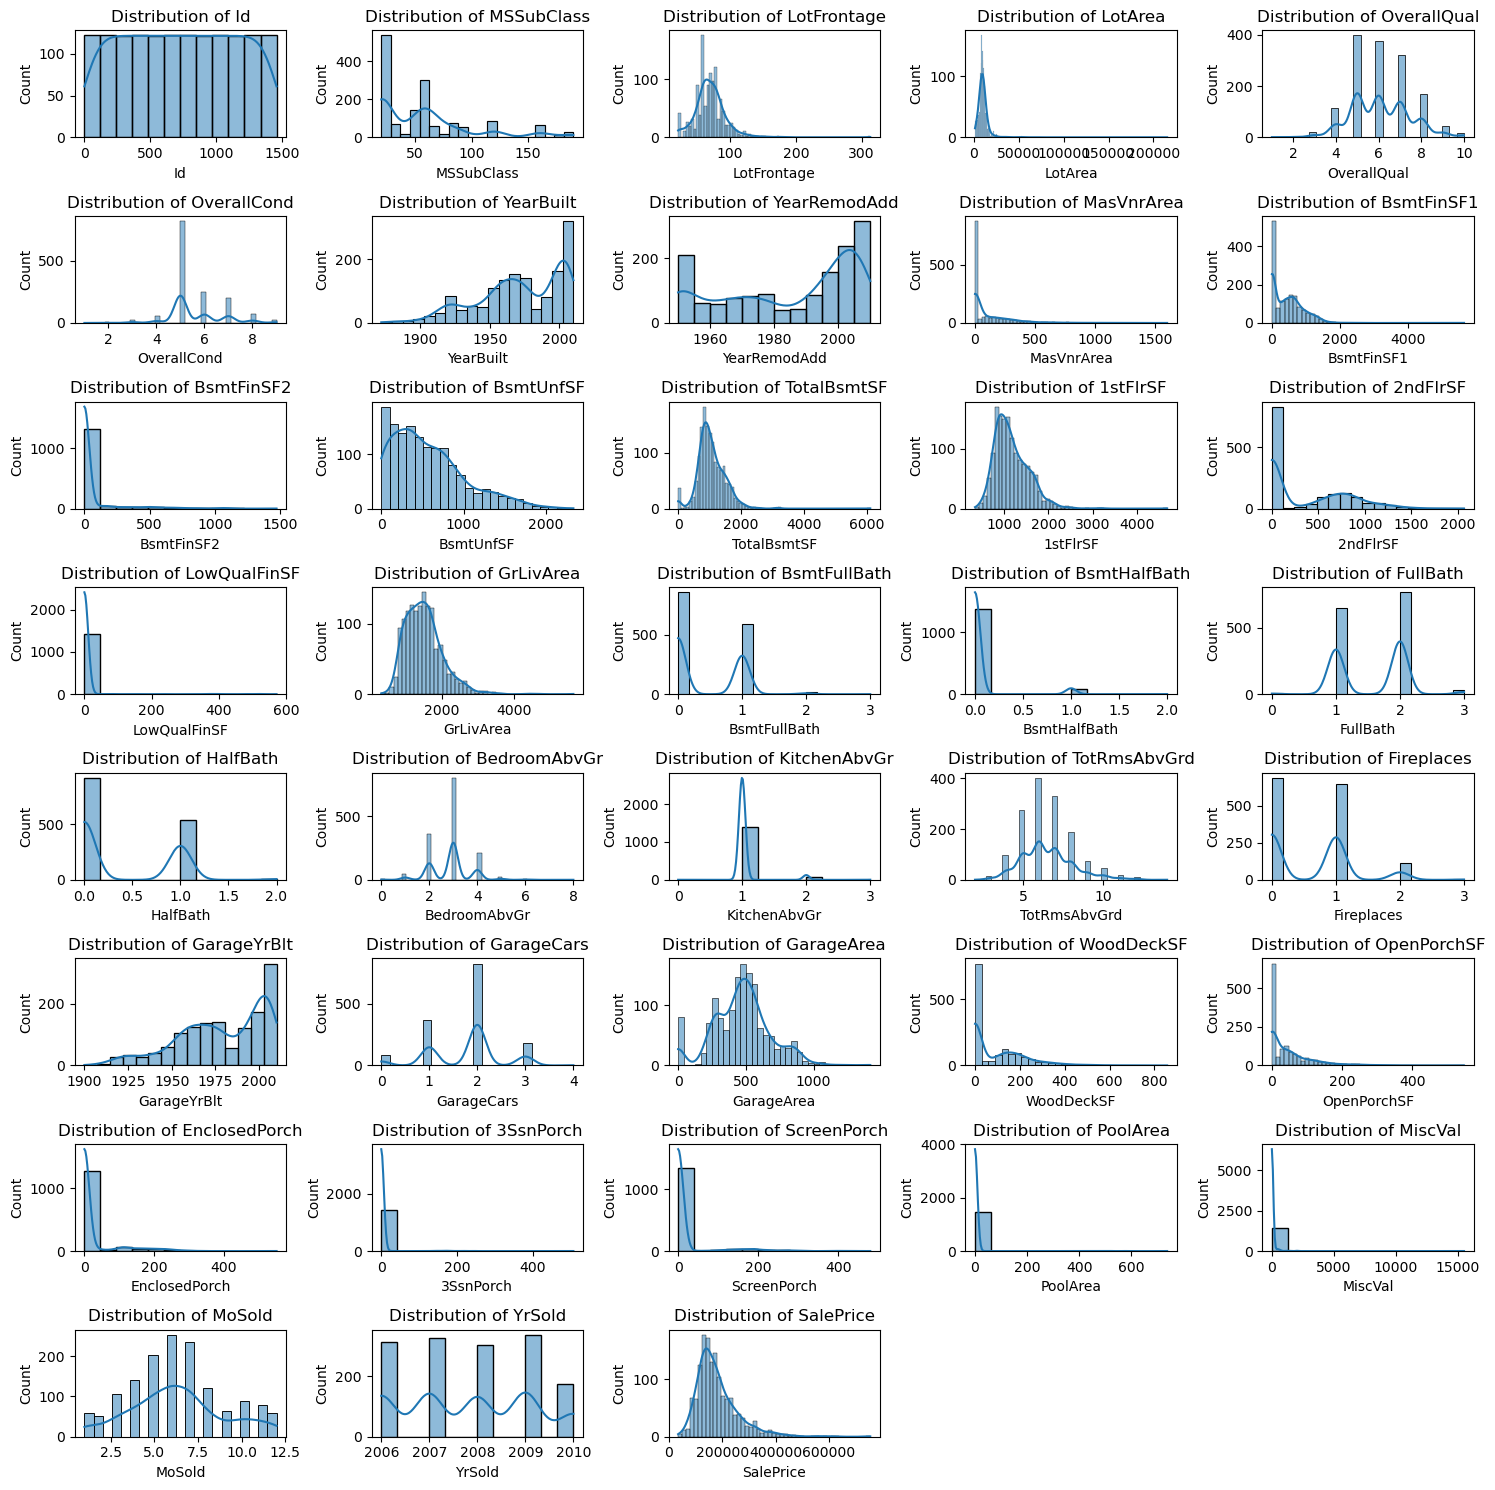

Skewness of numerical features:
MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
TotalBsmtSF       1.522688
1stFlrSF          1.375342
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtHalfBath      4.099186
KitchenAbvGr      4.483784
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
SalePrice         1.880941
dtype: float64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Check for missing values
missing_data = trainData.isnull().sum() / len(trainData) * 100
print(f"Percentage of missing values per feature:\n{missing_data[missing_data > 0]}")

# Visualize distributions for numeric features
numeric_features = trainData.select_dtypes(include=['int64', 'float64']).columns

print(f"Numeric features: {len(numeric_features)}")

plt.figure(figsize=(15, 15))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(8, 5, i)  # Adjust grid size as per number of features
    sns.histplot(trainData[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.tight_layout()

plt.show()

# Skewness check
skewness = trainData[numeric_features].apply(lambda x: skew(x.dropna()))
print(f"Skewness of numerical features:\n{skewness[skewness > 1]}")


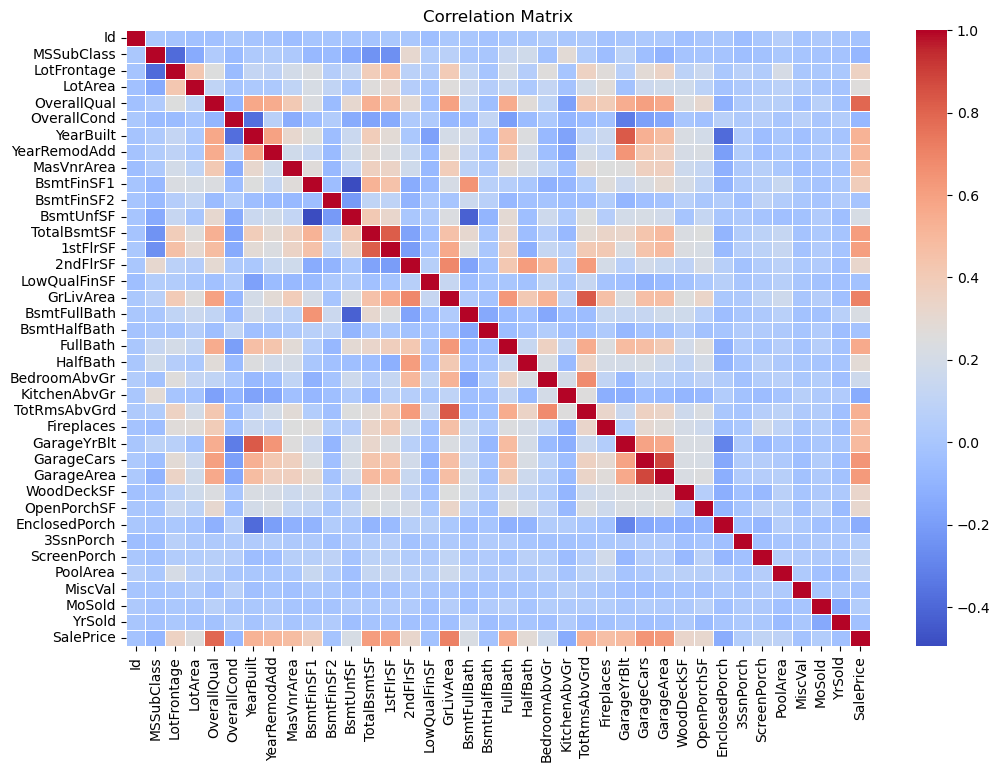

In [9]:
# Calculate correlation matrix
corr_matrix = trainData[numeric_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [10]:
# # Replace infinite values with NaN
# trainData = trainData.replace([np.inf, -np.inf], np.nan)

# # Impute missing values (NaN) with the mean of each column
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean') # You can change the strategy if needed
# trainData = pd.DataFrame(imputer.fit_transform(trainData), columns=trainData.columns)

# # Recalculate trainData_const with the imputed data
# from statsmodels.tools.tools import add_constant
# trainData_const = add_constant(trainData[numeric_features])

# # Import the variance_inflation_factor function
# from statsmodels.stats.outliers_influence import variance_inflation_factor


# # Now calculate VIF
# vif = pd.DataFrame()
# vif['Feature'] = trainData_const.columns
# vif['VIF'] = [variance_inflation_factor(trainData_const.values, i) for i in range(trainData_const.shape[1])]

# print(f"VIF values:\n{vif[vif['VIF'] > 10]}")

In [11]:
trainData_x = trainData.drop('SalePrice', axis=1)
trainData_y = trainData['SalePrice']

In [12]:
# First, let's generate a list of the unique data types present in our training dataset
# Recall that a "set" is a tuple of non-repeating entries. So by passing our "dtypes" into
# a set, we end up with a list with one instance of each datatype
trainData_dtypes = list(set(trainData.dtypes))
trainData_dtypes

[dtype('float64'), dtype('int64'), dtype('O')]

In [13]:
train_numeric_data = trainData.select_dtypes(include=[pd.Float64Dtype, pd.Int64Dtype]).drop(columns=['SalePrice'], axis=1)
train_numeric_data

/var/folders/nm/bgz9hyls08x2v48531bxj1nh0000gn/T/ipykernel_29275/2876505525.py:1: UserWarning: Instantiating Float64Dtype without any arguments.Pass a Float64Dtype instance to silence this warning.
  train_numeric_data = trainData.select_dtypes(include=[pd.Float64Dtype, pd.Int64Dtype]).drop(columns=['SalePrice'], axis=1)
/var/folders/nm/bgz9hyls08x2v48531bxj1nh0000gn/T/ipykernel_29275/2876505525.py:1: UserWarning: Instantiating Int64Dtype without any arguments.Pass a Int64Dtype instance to silence this warning.
  train_numeric_data = trainData.select_dtypes(include=[pd.Float64Dtype, pd.Int64Dtype]).drop(columns=['SalePrice'], axis=1)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010


In [14]:
# As we did above, we will generate a new object to house our categorical features, this time by passing all
# 'object' dtypes as our filter
train_cat_ord_data = trainData.select_dtypes(include=object)
train_cat_ord_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NaN,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,NaN,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [15]:
# We will establish separate pipelines for the numeric and categorical data in our dataset.
# The types of feature engineering and imputation strategies I've chosen are by no means the best avaiable,
# they are simply a starting point. Please feel encouraged to experiment - and report on the results of
# those experiments in your A2 write-up.

num_pipeline = sklearn.pipeline.Pipeline(
    steps = [('imputer', SimpleImputer(strategy='median')),
             ('scaler', StandardScaler())]
)

cat_pipeline = sklearn.pipeline.Pipeline(
    steps = [('cat_imputer', SimpleImputer(strategy='most_frequent')),
             ("encoder", OneHotEncoder(handle_unknown="ignore"))]
)

# The ColumnTransformer allows us to combine multiple pipelines into one new object, so when we go to pass our
# unaltered training data into our transformaiton pipeline, we can accomplish the task using one "fit_transform()"
# method.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, train_numeric_data.columns),
        ('cat', cat_pipeline, train_cat_ord_data.columns),
    ]
)

In [16]:
processed_train_data = preprocessor.fit_transform(trainData)
processed_train_data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 116800 stored elements and shape (1460, 288)>

In [17]:
# We can't pass back the column names from the original 'train' DF; we've generated many
# new columns as the result of our one-hot-encoding. Nevertheless, we can still generate
# a dataframe in order to help visualize the data transformations we've undertaken
pd.DataFrame.sparse.from_spmatrix(processed_train_data, index=None, columns=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.5172,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.10781,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.91221,-0.951226,1.017598,0.311725,0.351,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0,0,0,1.0,0,0,1.0,1.0,0,0,0,0,1.0,...,0,0,0,1.0,0,0,0,0,0,1.0,0,0,0,0,0,1.0,0,0,0,0,1.0,0,0,1.0,0,0,1.0,0,0,1.0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,1.0,0
1,-1.728492,-0.872563,0.46032,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.57075,1.171992,-0.288653,-0.641228,0.466465,0.25714,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.107927,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.48911,-0.614439,0,0,0,1.0,0,0,1.0,1.0,0,0,0,0,1.0,...,0,1.0,0,1.0,0,0,0,0,0,1.0,0,0,0,0,0,1.0,0,0,0,0,1.0,0,0,1.0,0,0,1.0,0,0,1.0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,1.0,0
2,-1.72612,0.073375,-0.084636,0.07348,0.651479,-0.5172,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.10781,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.934226,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0,0,0,1.0,0,0,1.0,1.0,0,1.0,0,0,0,...,0,1.0,0,1.0,0,0,0,0,0,1.0,0,0,0,0,0,1.0,0,0,0,0,1.0,0,0,1.0,0,0,1.0,0,0,1.0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,1.0,0
3,-1.723747,0.309859,-0.44794,-0.096897,0.651479,-0.5172,-1.863632,-0.720298,-0.57075,-0.499274,-0.288653,-0.06167,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.10781,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.809167,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,0,0,0,1.0,0,0,1.0,1.0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,1.0,0,0,1.0,0,0,0,0,1.0,0,0,0,0,1.0,0,0,1.0,0,0,1.0,0,0,1.0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,1.0,1.0,0,0,0,0,0
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.5172,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.19968,-0.045611,1.617877,-0.120242,1.299326,1.10781,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.89254,1.650307,1.698485,0.780197,0.56376,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0,0,0,1.0,0,0,1.0,1.0,0,1.0,0,0,0,...,0,1.0,0,1.0,0,0,0,0,0,1.0,0,0,0,0,0,1.0,0,0,0,0,1.0,0,0,1.0,0,0,1.0,0,0,1.0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.357114,-0.26056,-0.071836,-0.5172,0.918511,0.733308,-0.57075,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,-0.120242,0.250402,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,0.850854,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,0,0,0,1.0,0,0,1.0,1.0,0,0,0,0,1.0,...,0,1.0,0,1.0,0,0,0,0,0,1.0,0,0,0,0,0,1.0,0,0,0,0,1.0,0,0,1.0,0,0,1.0,0,0,1.0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,1.0,0
1456,1.723747,-0.872563,0.687385,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,-0.120242,1.061367,1.10781,-0.241061,0.789741

In [18]:
# We can generate a list of the newly created one_hot_encoded features using the code snippet below
new_one_hot_features = preprocessor.transformers_[1][1]['encoder'].get_feature_names_out(train_cat_ord_data.columns)
new_one_hot_features

array(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl',
       'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub',
       'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_

In [19]:
# LASSO REGRESSION

In [20]:
# Generate an instance of your model; be sure to specify the alpha value, which will control the regularization
# term applied to the loss function
lasso_reg = Lasso(alpha=0.001, max_iter=10000, selection='cyclic')
lasso_reg.fit(processed_train_data, trainData['SalePrice'])

/opt/anaconda3/envs/islp/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105993324446.99484, tolerance: 920791133.4609987
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso(alpha=0.001, max_iter=10000)

In [21]:
lasso_reg.coef_

array([ 4.35022468e+02, -2.20252069e+03,  8.97960710e+02,  7.34055887e+03,
        8.87348365e+03,  6.44756548e+03,  9.21070747e+03,  2.05474117e+03,
        3.05375121e+03,  1.27659150e+04,  3.08343652e+03,  3.95968178e+03,
        2.51833237e+03,  1.64183422e+04,  2.48490592e+04, -2.94481111e+02,
        3.72174089e+03,  5.49512073e+02, -2.11933265e+02,  2.20070590e+03,
        8.93025605e+02, -2.96896845e+03, -2.81386950e+03,  2.51335229e+03,
        1.80455883e+03,  5.87228357e+02,  2.21844286e+03,  2.98793246e+03,
        1.92845568e+03,  3.61075141e+02,  1.16402148e+02,  9.24580572e+02,
        1.90302890e+03,  3.91996824e+03,  1.73812523e+03, -1.27005742e+03,
       -6.71336347e+02, -2.44935709e+04,  1.09663458e+04,  1.49453034e+03,
        3.36222323e+03, -1.41221646e+03, -3.20806212e+04,  5.30840505e-11,
       -1.29515070e+03,  1.51075628e-10, -1.96272406e+03,  2.91886853e+03,
        3.19289036e+03, -1.50847377e+02, -6.36971044e+03,  2.38376498e+03,
       -1.54316048e+04,  

In [22]:
# print len
print(len(lasso_reg.coef_))

print(len(trainData_x.columns))

288
80


In [23]:
feature_list = list(train_numeric_data.columns) + list(new_one_hot_features)

In [24]:
# Let's form a new DF that has the feature labels and coefficient values for our fitted model
# We will also sort the values
train_coef_df = pd.DataFrame(lasso_reg.coef_, index=feature_list, columns=['coef_value'])
train_coef_df.sort_values(by='coef_value')

,coef_value
RoofMatl_ClyTile,-681623.387468
Condition2_PosN,-197675.328722
GarageCond_Ex,-116462.154948
Condition2_RRAe,-67112.947264
Functional_Sev,-60136.424346
...,...
BsmtCond_Po,69035.325972
Condition2_PosA,76816.879075
RoofMatl_Membran,77840.200516
RoofStyle_Shed,89721.613752


In [25]:
# Did the Lasso Regression with my chosen alpha value lead to the elimination
# (i.e. reduction towards zero) of many coefficients?
train_coef_df[(train_coef_df['coef_value']>= -5) & (train_coef_df['coef_value']<= 5)]

,coef_value
Street_Pave,5.308405e-11
Alley_Pave,1.510756e-10
Utilities_NoSeWa,-8.482232e-09
ExterQual_TA,-3.904165e-04
BsmtCond_TA,2.793813e-05
Heating_GasW,-6.893450e-07
CentralAir_Y,-1.099044e-08
Electrical_SBrkr,0.000000e+00
GarageType_Basment,6.690115e-03
GarageCond_TA,-0.000000e+00


In [26]:
# Import the performance measures
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the training data
train_predictions = lasso_reg.predict(processed_train_data)

# Compute R2 for training data
r2_score(trainData['SalePrice'], train_predictions)

0.9320764162944779

In [27]:
# from sklearn.model_selection import train_test_split

# trainData_x, trainData_x, trainData_y, testData_y = train_test_split(trainData_x, trainData_y, test_size=0.2, random_state=42)

In [28]:
# # Assuming 'YearBuilt' is in the dataset
# train_data = trainData_x[trainData_x['YearBuilt'] < 2010]
# test_data = trainData_x[trainData_x['YearBuilt'] >= 2010]

# X_train = train_data
# # Reset the index of train_data and use .iloc to select corresponding rows in trainData_y
# y_train = trainData_y.iloc[train_data.index.get_indexer(train_data.index)]
# X_test = test_data
# # Reset the index of test_data and use .iloc to select corresponding rows in trainData_y
# y_test = trainData_y.iloc[test_data.index.get_indexer(test_data.index)]

In [29]:
# Specify the range for lambdas
l_min = 0
l_max = 0.01
l_num = 50 # Number of points in the grid
lambdas = np.linspace(l_min, l_max, l_num)
lambdas

array([0.        , 0.00020408, 0.00040816, 0.00061224, 0.00081633,
       0.00102041, 0.00122449, 0.00142857, 0.00163265, 0.00183673,
       0.00204082, 0.0022449 , 0.00244898, 0.00265306, 0.00285714,
       0.00306122, 0.00326531, 0.00346939, 0.00367347, 0.00387755,
       0.00408163, 0.00428571, 0.0044898 , 0.00469388, 0.00489796,
       0.00510204, 0.00530612, 0.0055102 , 0.00571429, 0.00591837,
       0.00612245, 0.00632653, 0.00653061, 0.00673469, 0.00693878,
       0.00714286, 0.00734694, 0.00755102, 0.0077551 , 0.00795918,
       0.00816327, 0.00836735, 0.00857143, 0.00877551, 0.00897959,
       0.00918367, 0.00938776, 0.00959184, 0.00979592, 0.01      ])

In [30]:
valid_R2 = np.zeros(l_num)
valid_R2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Enumerarte over the range of lambdas
# Import train_test_split for creating validation data
from sklearn.model_selection import train_test_split

# Create validation sets (adjust test_size as needed)
X_train_lasso, X_valid_lasso, y_train_lasso, y_valid_lasso = train_test_split(
    processed_train_data, trainData['SalePrice'], test_size=0.2, random_state=42
)

valid_R2 = np.zeros(l_num)
for ind, i in enumerate(lambdas):
    # For each value of alpha/lambda, specify the LASSO model
    lasso_reg = Lasso(alpha=i, max_iter=10000, selection='cyclic')

    # Fit the specified model to the training data
    lasso_reg.fit(X_train_lasso, y_train_lasso)

    # Use the fitted model to make predictions for the validation data
    validData_y_pred_las = lasso_reg.predict(X_valid_lasso)

    # Compute and store the r-squared in the array
    valid_R2[ind] = r2_score(y_valid_lasso, validData_y_pred_las)

/opt/anaconda3/envs/islp/lib/python3.11/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/islp/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223260218179.0324, tolerance: 696659484.3571943
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/envs/islp/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94580070470.81625, tolerance: 696659484.3571943
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/envs/islp/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Obj

In [ ]:
# For those who are interested, the enumerate function can be VERY useful in your programming. Let's see what's going on under the hood
for h,i in enumerate(lambdas):
  print(h, i)

In [ ]:
lambdas

In [ ]:
valid_R2

In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the size of the figure
plt.figure(figsize = (12,6))

# Plot
plt.plot(lambdas, valid_R2, linewidth=3)

# Specify the x-axis and y-axis
plt.xlabel('lambda'); plt.ylabel('$R_{validation}^2$')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = np.logspace(-3, 2, 50)
test_scores = []

for alpha in alphas:
    clf = Ridge(alpha=alpha)
    neg_mse = cross_val_score(clf,
                              processed_train_data,
                              trainData['SalePrice'],
                              cv=10,
                              scoring='neg_mean_squared_error')
    rmse = np.sqrt(-neg_mse)
    test_scores.append(rmse.mean())

best_index = np.argmin(test_scores)
best_ridge_alpha = alphas[best_index]
best_score = test_scores[best_index]
print(f"Best ridge alpha: {best_ridge_alpha:.4f}, RMSE: {best_score:.4f}")

plt.plot(alphas, test_scores, marker='o')
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Average RMSE (10-fold CV)")
plt.title("Ridge CV - RMSE vs. Alpha")

tick_values = [0.001, 0.01, 0.1, 1, 10, 100]
plt.xticks(tick_values, tick_values)

plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

## Train Ridge Reg using best alpha

In [ ]:
ridge_reg = Ridge(alpha=best_ridge_alpha)
ridge_reg.fit(processed_train_data, trainData['SalePrice'])

In [ ]:
# Apply the already created pipeline transformer to the test dataset
test_rdy = preprocessor.transform(testData)
test_rdy.shape

In [ ]:
test_pred = ridge_reg.predict(test_rdy)

In [ ]:
# Generate a DF object that will house our predictions (which currently reside in an array titled 'pred')
df = pd.DataFrame(index=np.arange(len(testData)), columns=['Id', 'SalePrice'])
df['Id'] = testData['Id']
df['SalePrice'] = test_pred
# View the output
df

In [ ]:
# Let's get a quick understanding of the statistical descriptive characteristics of our
# predictions
df.describe()

In [ ]:
# Plot a histogram of the SalePrice column
df['SalePrice'].plot.hist()

In [ ]:
# Use the .to_csv() method in Pandas to output our results to a .csv file for submission to Kaggle
df.to_csv('./ridge_pred.csv', index=False)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.linear_model import Lasso
# from sklearn.model_selection import cross_val_score

# alphas = np.logspace(-3, 2, 50)
# test_scores = []

# for alpha in alphas:
#     clf = Lasso(alpha=alpha)
#     neg_mse = cross_val_score(clf,
#                               processed_train_data,
#                               trainData['SalePrice'],
#                               cv=10,
#                               scoring='neg_mean_squared_error')
#     rmse = np.sqrt(-neg_mse)
#     test_scores.append(rmse.mean())

# best_index = np.argmin(test_scores)
# best_alpha = alphas[best_index]
# best_score = test_scores[best_index]
# print(f"Best alpha: {best_alpha:.4f}, RMSE: {best_score:.4f}")

# plt.plot(alphas, test_scores, marker='o')
# plt.xscale('log')
# plt.xlabel("Alpha (log scale)")
# plt.ylabel("Average RMSE (10-fold CV)")
# plt.title("Lasso CV - RMSE vs. Alpha")

# tick_values = [0.001, 0.01, 0.1, 1, 10, 100]
# plt.xticks(tick_values, tick_values)

# plt.grid(True, which="both", ls="--", alpha=0.5)
# plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

alphas = np.logspace(0, 3, 50)
test_scores = []

for alpha in alphas:
    clf = Lasso(alpha=alpha)
    neg_mse = cross_val_score(clf,
                              processed_train_data,
                              trainData['SalePrice'],
                              cv=10,
                              scoring='neg_mean_squared_error')
    rmse = np.sqrt(-neg_mse)
    test_scores.append(rmse.mean())

best_index = np.argmin(test_scores)
best_alpha = alphas[best_index]
best_score = test_scores[best_index]
print(f"Best alpha: {best_alpha:.4f}, RMSE: {best_score:.4f}")

plt.plot(alphas, test_scores, marker='o')
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Average RMSE (10-fold CV)")
plt.title("Lasso CV - RMSE vs. Alpha")

tick_values = [0.001, 0.01, 0.1, 1, 10, 100]
plt.xticks(tick_values, tick_values)

plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

In [ ]:
best_alpha

In [ ]:
lasso_reg = Lasso(alpha=best_alpha)
lasso_reg.fit(processed_train_data, trainData['SalePrice'])


In [ ]:
# Apply the already created pipeline transformer to the test dataset
test_rdy = preprocessor.transform(testData)
test_rdy.shape

test_pred = lasso_reg.predict(test_rdy)

# Generate a DF object that will house our predictions (which currently reside in an array titled 'pred')
df = pd.DataFrame(index=np.arange(len(testData)), columns=['Id', 'SalePrice'])
df['Id'] = testData['Id']
df['SalePrice'] = test_pred
# View the output
df

# Let's get a quick understanding of the statistical descriptive characteristics of our
# predictions
df.describe()

# Plot a histogram of the SalePrice column
df['SalePrice'].plot.hist()

# Use the .to_csv() method in Pandas to output our results to a .csv file for submission to Kaggle
df.to_csv('./lasso_pred.csv', index=False)

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.linear_model import Ridge, Lasso
# from sklearn.model_selection import train_test_split

# # Assuming X_train, y_train are defined...

# # Split data for Ridge
# X_train_ridge, X_valid_ridge, y_train_ridge, y_valid_ridge = train_test_split(
#     X_train, y_train, test_size=0.2, random_state=42
# )

# # Split data for Lasso (if not already split)
# # X_train_lasso, X_valid_lasso, y_train_lasso, y_valid_lasso = train_test_split(
# #     X_train, y_train, test_size=0.2, random_state=42
# # )

# # Create and train Ridge model
# ridge_best_model = Ridge(alpha=0.1)  # Adjust alpha as needed
# ridge_best_model.fit(X_train_ridge, y_train_ridge)

# # Create and train Lasso model (if not already trained)
# lasso_best_model = Lasso(alpha=0.001)  # Adjust alpha as needed
# lasso_best_model.fit(X_train_lasso, y_train_lasso)

# # Now plot feature importances
# plt.figure(figsize=(10, 6))
# plt.barh(X_train.columns, ridge_best_model.coef_)
# plt.title('Ridge Regression Feature Importance')
# plt.xlabel('Feature Importance (Coefficient)')
# plt.show()

# plt.figure(figsize=(10, 6))
# plt.barh(X_train.columns, lasso_best_model.coef_)
# plt.title('Lasso Regression Feature Importance')
# plt.xlabel('Feature Importance (Coefficient)')
# plt.show()